In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp

In [ ]:
# Load each dataset
employee= pd.read_csv("Employees.csv")
machine = pd.read_csv("Machines.csv")
production = pd.read_csv("Production Schedule.csv")
quality = pd.read_csv("Quality.csv")

In [ ]:
# Display the first few rows of each dataset
print("Employee Data:\n", employee.head())
print("\nMachine Data:\n", machine.head())
print("\nProduction Data:\n", production.head())
print("\nQuality Data:\n",quality.head())

Employee Data:
   EmployeeID  Age  Experience (Years)        Education Training Status
0       E006   55                39.4      High School            High
1       E028   36                16.8  Master's Degree            High
2       E005   57                39.1      High School            High
3       E003   22                 3.1          Diploma             Low
4       E046   31                10.5  Master's Degree            High

Machine Data:
   MachineID     Make  Model              Date Shift Assigned (Yes/No)
0      M001   Singer  B2000  October 01, 2023   Day                No
1      M002     Juki  B2000  October 01, 2023   Day                No
2      M003   Singer  B2000  October 01, 2023   Day                No
3      M004   Singer  J3000  October 01, 2023   Day                No
4      M005  Brother  S1000  October 01, 2023   Day               Yes

Production Data:
          Date  Shift GarmentType  TargetUnits  \
0  2023-10-01    Day      Jacket          409   
1  20

In [ ]:
# check the data info
employee.info()
production.info()
machine.info()
quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EmployeeID          50 non-null     object 
 1   Age                 50 non-null     int64  
 2   Experience (Years)  50 non-null     float64
 3   Education           50 non-null     object 
 4   Training Status     50 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 2.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         62 non-null     object
 1   Shift        62 non-null     object
 2   GarmentType  62 non-null     object
 3   TargetUnits  62 non-null     int64 
 4   EmployeeIDs  62 non-null     object
dtypes: int64(1), object(4)
memory usage: 2.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3100

In [ ]:
# Check for missing values in each dataset
print("Missing values in Employee Data:\n", employee.isnull().sum())
print("\nMissing values in Machine Data:\n", machine.isnull().sum())
print("\nMissing values in Production Data:\n", production.isnull().sum())
print("\nMissing values in Quality Data:\n", quality.isnull().sum())

Missing values in Employee Data:
 EmployeeID            0
Age                   0
Experience (Years)    0
Education             0
Training Status       0
dtype: int64

Missing values in Machine Data:
 MachineID            0
Make                 0
Model                0
Date                 0
Shift                0
Assigned (Yes/No)    0
dtype: int64

Missing values in Production Data:
 Date           0
Shift          0
GarmentType    0
TargetUnits    0
EmployeeIDs    0
dtype: int64

Missing values in Quality Data:
 Date            0
Shift           0
DefectsCount    0
dtype: int64


In [ ]:
# Clean and standardize the Date column format for quality
quality['Date'] = pd.to_datetime(quality['Date']).dt.strftime('%Y-%m-%d')


In [ ]:
# Clean and standardize the Date column format for machine (only if it is in the format '%B %d, %Y')
machine['Date'] = pd.to_datetime(machine['Date'], errors='coerce').dt.strftime('%Y-%m-%d')

In [ ]:
# Display the results
print(quality['Date'])
print(machine['Date'])

0     2023-10-01
1     2023-10-01
2     2023-10-02
3     2023-10-02
4     2023-10-03
         ...    
57    2023-10-29
58    2023-10-30
59    2023-10-30
60    2023-10-31
61    2023-10-31
Name: Date, Length: 62, dtype: object
0       2023-10-01
1       2023-10-01
2       2023-10-01
3       2023-10-01
4       2023-10-01
           ...    
3095    2023-10-31
3096    2023-10-31
3097    2023-10-31
3098    2023-10-31
3099    2023-10-31
Name: Date, Length: 3100, dtype: object


In [ ]:
# Merge the production schedule with the quality data on Date and Shift
merged_pq = pd.merge(production, quality, on=['Date', 'Shift'], how='left')
merged_pq.head(20)
merged_pq['Date'].info()
merged_pq.shape

<class 'pandas.core.series.Series'>
RangeIndex: 62 entries, 0 to 61
Series name: Date
Non-Null Count  Dtype 
--------------  ----- 
62 non-null     object
dtypes: object(1)
memory usage: 624.0+ bytes


(62, 6)

In [ ]:
# Rename columns
employee.rename(columns={'EmployeeID': 'Employee', 'Experience (Years)': 'Experience'}, inplace=True)
employee.columns
emp = employee
emp.columns

Index(['Employee', 'Age', 'Experience', 'Education', 'Training Status'], dtype='object')

In [ ]:
# Summary statistics for numeric fields
print("Employee Data Summary:\n", emp.describe().T)
print("\nMachine Data Summary:\n", machine.describe().T)
print("\nProduction Data Summary:\n", production.describe().T)
print("\nQuality Data Summary:\n", quality.describe().T)

Employee Data Summary:
             count    mean        std   min     25%   50%    75%   max
Age          50.0  42.640  12.171831  22.0  34.250  42.0  54.00  60.0
Experience   50.0  22.224  12.469908   0.0  14.025  21.6  32.55  41.7

Machine Data Summary:
                   count unique         top  freq
MachineID          3100     50        M001    62
Make               3100      3      Singer  1113
Model              3100      3       B2000  1045
Date               3100     31  2023-10-01   100
Shift              3100      2         Day  1550
Assigned (Yes/No)  3100      2          No  2537

Production Data Summary:
              count        mean         std    min     25%    50%    75%    max
TargetUnits   62.0  521.225806  115.604671  301.0  420.75  535.0  623.5  690.0

Quality Data Summary:
               count       mean       std  min    25%   50%   75%   max
DefectsCount   62.0  15.709677  6.425837  5.0  10.25  16.0  21.0  25.0


In [ ]:
# List of DataFrames to check for duplicates
dataframes = [emp, production, machine, quality]

In [ ]:
# Loop through each DataFrame and check for duplicates
for df in dataframes:
    print(f'Duplicates in {df}: {df.duplicated().sum()}')

Duplicates in    Employee  Age  Experience          Education Training Status
0      E006   55        39.4        High School            High
1      E028   36        16.8    Master's Degree            High
2      E005   57        39.1        High School            High
3      E003   22         3.1            Diploma             Low
4      E046   31        10.5    Master's Degree            High
5      E018   46        26.1  Bachelor's Degree            High
6      E013   34        14.7    Master's Degree            High
7      E037   23         1.1            Diploma             Low
8      E036   57        32.6            Diploma          Medium
9      E022   52        32.3            Diploma          Medium
10     E043   23         0.0    Master's Degree             Low
11     E035   43        23.5        High School            High
12     E048   58        40.6        High School          Medium
13     E016   57        41.0            Diploma          Medium
14     E015   39        19

In [ ]:
# Function to calculate required statistics for each row in merged_pq
def calculate_employee_stats(employee_ids_str):
    # Split and strip each employee ID to ensure no extra spaces
    employee_ids = [emp_id.strip() for emp_id in employee_ids_str.split(',')]

    # Filter employees who are in the current EmployeeIDs list
    relevant_employees = emp[emp['Employee'].isin(employee_ids)]
      # Calculate the required statistics
    avg_age = relevant_employees['Age'].mean()
    avg_experience = relevant_employees['Experience'].mean()
    num_of_highschool = sum(relevant_employees['Education'] == 'High School')
    num_of_masters = sum(relevant_employees['Education'] == "Master's Degree")
    num_of_diploma = sum(relevant_employees['Education'] == 'Diploma')
    num_of_bachelors = sum(relevant_employees['Education'] == "Bachelor's Degree")

    return pd.Series([avg_age, avg_experience, num_of_highschool, num_of_masters, num_of_diploma, num_of_bachelors])

In [ ]:
# Apply the function to each row in merged_pq
merged_pq[['average_age', 'average_experience', 'num_high_school', 'num_masters', 'num_diploma', 'num_bachelors']] = \
merged_pq['EmployeeIDs'].apply(calculate_employee_stats)

In [ ]:
# Ensure average_age and average_experience are rounded to 2 decimal places and convert to float
merged_pq['average_age'] = merged_pq['average_age'].round(2).astype(float)
merged_pq['average_experience'] = merged_pq['average_experience'].round(2).astype(float)


In [ ]:
# Convert education count columns to integer type explicitly to remove decimals
merged_pq['num_high_school'] = merged_pq['num_high_school'].astype(int)
merged_pq['num_masters'] = merged_pq['num_masters'].astype(int)
merged_pq['num_diploma'] = merged_pq['num_diploma'].astype(int)
merged_pq['num_bachelors'] = merged_pq['num_bachelors'].astype(int)
# Display the updated DataFrame with only relevant columns
print(merged_pq[['Date', 'Shift', 'GarmentType', 'TargetUnits', 'EmployeeIDs', 'DefectsCount',
                 'average_age', 'average_experience', 'num_high_school', 'num_masters', 'num_diploma', 'num_bachelors']].head(10))


merged_pq.to_csv('final_dataset.csv', index=False)

         Date  Shift GarmentType  TargetUnits  \
0  2023-10-01    Day      Jacket          409   
1  2023-10-01  Night       Dress          635   
2  2023-10-02    Day      Jacket          450   
3  2023-10-02  Night       Jeans          683   
4  2023-10-03    Day      Jacket          654   
5  2023-10-03  Night       Dress          590   
6  2023-10-04    Day      Jacket          582   
7  2023-10-04  Night     T-Shirt          616   
8  2023-10-05    Day       Shirt          689   
9  2023-10-05  Night       Shirt          664   

                                         EmployeeIDs  DefectsCount  \
0  E027, E049, E043, E025, E011, E003, E023, E029...             8   
1  E026, E002, E004, E041, E032, E042, E024, E003...            24   
2  E037, E010, E010, E027, E039, E030, E030, E018...            13   
3  E015, E041, E024, E041, E035, E023, E028, E036...            20   
4  E013, E030, E028, E042, E012, E019, E037, E044...            10   
5  E044, E039, E038, E027, E024, E028, E

In [ ]:
# Filter assigned machines
assigned_machines_df = machine[machine['Assigned (Yes/No)'] == 'Yes']

# Filter unassigned machines

unassigned_machines_df = machine[machine['Assigned (Yes/No)'] == 'No']

# Merge the assigned and unassigned machines into one DataFrame

merged_df = pd.concat([assigned_machines_df, unassigned_machines_df])
merged_df
merged_df.shape
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3100 entries, 4 to 3099
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   MachineID          3100 non-null   object
 1   Make               3100 non-null   object
 2   Model              3100 non-null   object
 3   Date               3100 non-null   object
 4   Shift              3100 non-null   object
 5   Assigned (Yes/No)  3100 non-null   object
dtypes: object(6)
memory usage: 169.5+ KB


In [ ]:

# Assuming merged_df and merged_pq are already defined earlier in your code

# Group by Date, Shift, and Make, then count the number of each machine type
machine_counts = merged_df.groupby(['Date', 'Shift', 'Make']).size().unstack(fill_value=0)

# Rename columns for clarity
machine_counts.columns = ['num_of_Brother', 'num_of_Juki', 'num_of_Singer']

# Save the machine counts to a CSV file
machine_counts.to_csv('machine_counts.csv')

# Merge the machine counts back into merged_df based on Date and Shift
final_merged_df = pd.merge(merged_pq, machine_counts, on=['Date', 'Shift'], how='left')

# Select the relevant columns for the final dataframe
final_merged_df = final_merged_df[['Date', 'Shift', 'GarmentType', 'DefectsCount',
                                   'average_age', 'average_experience', 'num_high_school', 'num_masters',
                                   'num_diploma', 'num_bachelors', 'num_of_Brother', 'num_of_Juki', 'num_of_Singer']]

# Apply one-hot encoding to 'Shift' and 'GarmentType'
final_merged_df = pd.get_dummies(final_merged_df, columns=['Shift', 'GarmentType'], dtype='int64')

# Combine 'average_age' and 'average_experience' by averaging the two
final_merged_df['average_age_experience'] = (final_merged_df['average_age'] + final_merged_df['average_experience']) / 2

# Drop 'average_age' and 'average_experience' columns as they are now combined
final_merged_df = final_merged_df.drop(columns=['average_age', 'average_experience'])

# Drop the 'Shift_Night' column if it exists
final_merged_df = final_merged_df.drop(columns=['Shift_Night'], errors='ignore')

# Display the transformed dataframe
print(final_merged_df.head())


         Date  DefectsCount  num_high_school  num_masters  num_diploma  \
0  2023-10-01             8                2            2            4   
1  2023-10-01            24                2            3            4   
2  2023-10-02            13                1            3            2   
3  2023-10-02            20                4            2            3   
4  2023-10-03            10                3            3            3   

   num_bachelors  num_of_Brother  num_of_Juki  num_of_Singer  Shift_Day  \
0              2              14           11             25          1   
1              0              16           13             21          0   
2              1              15           13             22          1   
3              0              14           11             25          0   
4              1              20            8             22          1   

   GarmentType_Dress  GarmentType_Jacket  GarmentType_Jeans  \
0                  0                   1 

In [ ]:
# Save the final dataset to CSV
final_merged_df.to_csv('final_dataset_with_machines.csv', index=False)

# Display the updated DataFrame with machine counts
print(final_merged_df.head(10))

final_merged_df.shape
final_merged_df.info()
final_merged_df.columns

         Date  DefectsCount  num_high_school  num_masters  num_diploma  \
0  2023-10-01             8                2            2            4   
1  2023-10-01            24                2            3            4   
2  2023-10-02            13                1            3            2   
3  2023-10-02            20                4            2            3   
4  2023-10-03            10                3            3            3   
5  2023-10-03            17                2            5            1   
6  2023-10-04            11                3            1            4   
7  2023-10-04            15                2            3            4   
8  2023-10-05            16                3            2            5   
9  2023-10-05            24                6            2            2   

   num_bachelors  num_of_Brother  num_of_Juki  num_of_Singer  Shift_Day  \
0              2              14           11             25          1   
1              0              16   

Index(['Date', 'DefectsCount', 'num_high_school', 'num_masters', 'num_diploma',
       'num_bachelors', 'num_of_Brother', 'num_of_Juki', 'num_of_Singer',
       'Shift_Day', 'GarmentType_Dress', 'GarmentType_Jacket',
       'GarmentType_Jeans', 'GarmentType_Shirt', 'GarmentType_T-Shirt',
       'average_age_experience'],
      dtype='object')

In [ ]:
# Importing necessary libraries for regression and evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt


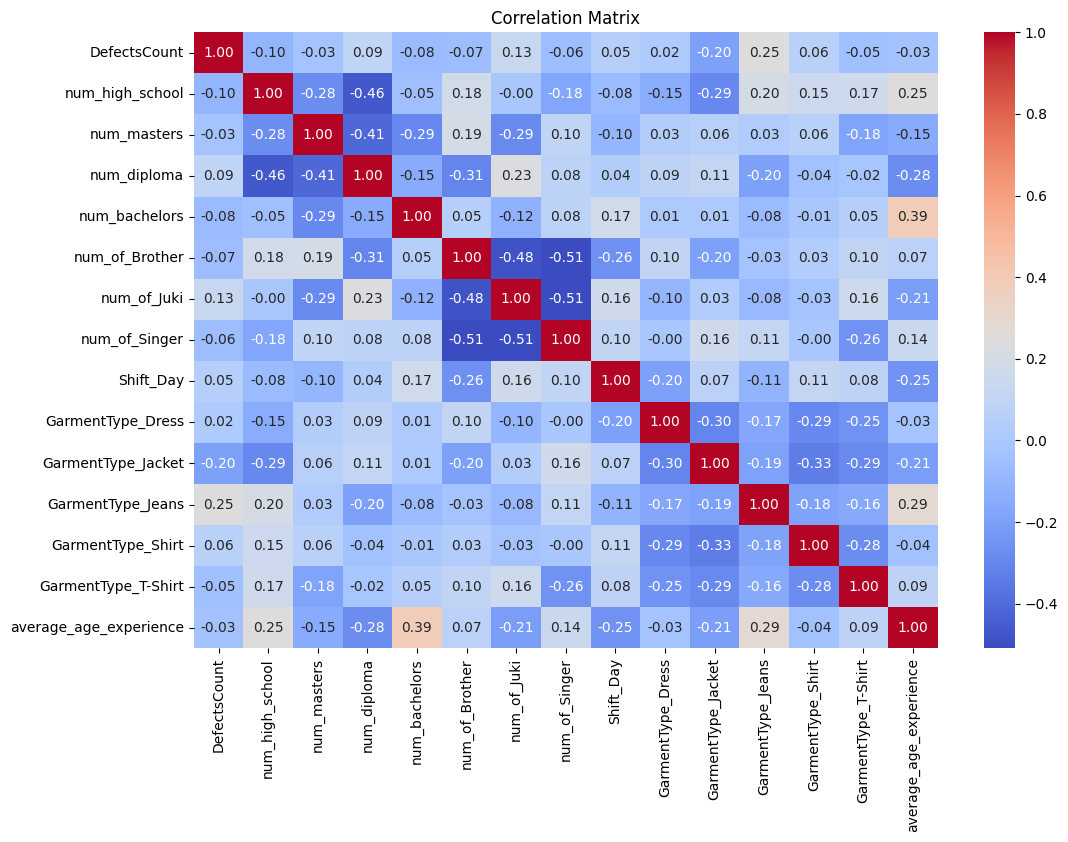

In [ ]:
# Select only numeric columns for correlation matrix
numeric_columns = final_merged_df.select_dtypes(include=[np.number]).columns

# Calculate the correlation matrix using only numeric columns
correlation_matrix = final_merged_df[numeric_columns].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
print(final_merged_df.columns)


Index(['Date', 'DefectsCount', 'num_high_school', 'num_masters', 'num_diploma',
       'num_bachelors', 'num_of_Brother', 'num_of_Juki', 'num_of_Singer',
       'Shift_Day', 'GarmentType_Dress', 'GarmentType_Jacket',
       'GarmentType_Jeans', 'GarmentType_Shirt', 'GarmentType_T-Shirt',
       'average_age_experience'],
      dtype='object')


In [ ]:
#Linear Regression
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.decomposition import PCA

# Load the dataset
file_path = '/content/final_dataset_with_machines.csv'
dataset = pd.read_csv(file_path)

# Drop the 'Date' column
data_cleaned = dataset.drop(columns=['Date'])

# Handle outliers using IQR
for col in data_cleaned.select_dtypes(include=['int64', 'float64']).columns:
    Q1 = data_cleaned[col].quantile(0.25)
    Q3 = data_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data_cleaned[col] = np.where(data_cleaned[col] < lower_bound, lower_bound,
                                 np.where(data_cleaned[col] > upper_bound, upper_bound, data_cleaned[col]))

# Identify numerical columns
numerical_columns = data_cleaned.select_dtypes(include=['int64', 'float64']).columns

# Scale numerical features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_cleaned[numerical_columns])

# Convert scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=numerical_columns)

# Add polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(scaled_df.drop(columns=['DefectsCount']))

# Apply PCA to reduce dimensionality
pca = PCA(n_components=10)  # Keep top 10 components
X_reduced = pca.fit_transform(X_poly)

# Separate features and target variable
X = X_reduced  # Features after PCA
y = scaled_df['DefectsCount']  # Target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Gradient Boosting Regressor with Grid Search
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7],
}
grid = GridSearchCV(GradientBoostingRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

# Get the best model
best_model = grid.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test)

# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_square = r2_score(y_test, y_pred)

# Print metrics
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R-squared: {r_square}")
print("Best Parameters:", grid.best_params_)


MAE: 0.8664017861499826
MSE: 1.0254307213984173
RMSE: 1.0126355323601959
R-squared: 0.07071140171471746
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}


In [ ]:
# Initialize the decision tree regressor with regularization parameters
model = DecisionTreeRegressor(
    max_depth=6,             # Limit the depth of the tree
    min_samples_split=5,    # Minimum samples required to split an internal node
    min_samples_leaf=2,      # Minimum samples required at a leaf node
    random_state=42
)

In [ ]:
#Decesion Tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import numpy as np
import pandas as pd

# Load the dataset
file_path = '/content/final_dataset_with_machines.csv'
dataset = pd.read_csv(file_path)

# Drop the 'Date' column if it's not necessary
data_cleaned = dataset.drop(columns=['Date'])

# Define target and features
y = data_cleaned['DefectsCount']  # Target variable (continuous)
X = data_cleaned.drop(columns=['DefectsCount'])  # All other columns are features

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Optional: Polynomial Features to capture non-linear relationships
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'max_depth': [3, 5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': [None, 'sqrt', 'log2'],
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],  # Correct criterion values
}

# Initialize and fit the model with GridSearchCV
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(X_train_poly, y_train)

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test_poly)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_square = r2_score(y_test, y_pred)

# Print evaluation results
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R-squared: {r_square}")
print(f"Best Hyperparameters: {grid_search.best_params_}")


MAE: 5.426831501831502
MSE: 41.21431656637014
RMSE: 6.4198377367633
R-squared: 0.08062044618313724
Best Hyperparameters: {'criterion': 'squared_error', 'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 2}


In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
from scipy.stats import zscore

# Load dataset
file_path = '/content/final_dataset_with_machines.csv'  # Adjust your file path
data = pd.read_csv(file_path)

# Drop missing values and reset index
data_cleaned = data.dropna().reset_index(drop=True)

# Separate features and target
numerical_columns = data_cleaned.select_dtypes(include=np.number).columns
target_column = 'DefectsCount'  # Adjust this if the column name differs
numerical_columns = numerical_columns.drop(target_column)
X = data_cleaned[numerical_columns]
y = data_cleaned[target_column]

# Apply log transformation to target variable if needed (for skewness reduction)
y = np.log1p(y)

# Remove outliers using Z-score method
z_scores = np.abs(zscore(X))
X = X[(z_scores < 3).all(axis=1)]
y = y[X.index]

# Scaling features using StandardScaler
scaler = StandardScaler()  # Change to StandardScaler for better SVM performance
X_scaled = scaler.fit_transform(X)

# Polynomial Features (degree=3 for increased interaction between features)
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

# Feature Selection (adjust k to select important features)
feature_selector = SelectKBest(score_func=f_regression, k=50)  # Select top 50 features
X_selected = feature_selector.fit_transform(X_poly, y)

# PCA for dimensionality reduction (90% variance)
pca = PCA(n_components=0.85)  # Retain 90% variance
X_reduced = pca.fit_transform(X_selected)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.1, random_state=42)

# Fixed hyperparameters for SVR
C_value = 0.9 # Fixed C value
epsilon_value = 0.00001 # Fixed epsilon value

# SVR Model with fixed hyperparameters
svr = SVR(kernel='rbf', C=C_value, epsilon=epsilon_value)

# Train the SVR model with fixed hyperparameters
svr.fit(X_train, y_train)

# Predictions with the fixed SVR model
y_pred_svr = svr.predict(X_test)

# SVR Evaluation metrics
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test, y_pred_svr)

# Print SVR results
print(f"SVR with C={C_value} and epsilon={epsilon_value}:")
print(f"SVR MAE: {mae_svr}")
print(f"SVR MSE: {mse_svr}")
print(f"SVR RMSE: {rmse_svr}")
print(f"SVR R-squared: {r2_svr}")



SVR with C=0.9 and epsilon=1e-05:
SVR MAE: 0.2365091054639276
SVR MSE: 0.07138758606548927
SVR RMSE: 0.26718455431684157
SVR R-squared: 0.6222960549213518
